In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

## Widget libraries
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Do not print out warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime
from datetime import datetime, date

from scipy import stats

import csv
import io
import re
#import pycountry

Data from: https://www.gov.uk/government/statistics/attainment-and-finance-data-for-secondary-schools-academic-year-2008-to-2009

In [93]:
#fn = 'data/gcse-english-and-maths-results-local-authority.csv'
#fn = 'data/2009KS4Publication.csv'
fn = 'data/2009KS4Publication_Selected.csv'

#df = pd.read_csv(fn, encoding='utf-8')
df = pd.read_csv(fn, encoding = "ISO-8859-1")

# Convert types
#df = df.astype({'alphabetic index': 'str', 'LA number': 'str', 'OLD LA number': 'str', 'ESTAB number': 'str'})

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['record type' 'Closed school'
 'institution in Key Stage 5 Performance Tables'
 'Number of KS4 pupils at the start of the school year '
 '2008-09 Expenditure Per Pupil' '2008-09 DSG + Grants per pupil']


In [94]:
df.head()

record type type of specialist school admissions policy gender of entry  \
0          1.0                       NaN               NaN           GIRLS   
1          1.0                       NaN               NaN            BOYS   
2          1.0                       B&E              COMP           MIXED   
3          1.0                 T,LEPP,TS              COMP           GIRLS   
4          1.0                         A              COMP           MIXED   

  feeder school for sixth form centre/consortia age range  \
0                                           NaN     07-18   
1                                           NaN     10-18   
2                                           NaN     11-18   
3                                             =     11-18   
4                                           NaN     11-18   

  no confirmation that school has checked its data  \
0                                              NaN   
1                                                R   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  number of pupils on roll (all ages)  Closed school  \
0                                 695            0.0   
1                                 884            0.0   
2                                1218            0.0   
3                                1241            0.0   
4                                 985            0.0   

   institution in Key Stage 5 Performance Tables  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

               ...                \
0              ...                 
1              ...                 
2              ...                 
3              ...                 
4              ...                 

  % of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008  \
0                                                 0%                                     
1                                                 0%                                     
2                                                32%                                     
3                                                44%                                     
4                                                36%                                     

  % of half days missed due to overall absence  \
0                                            @   
1                                            @   
2                                         8.1%   
3                                         8.3%   
4                                         9.0%   

   % of pupils persistently absent  \
0                                @   
1                                @   
2                             5.2%   
3                             7.2%   
4                             8.0%   

  % of pupils making expected progress between KS2 and GCSE English at end of KS4  \
0                                                  ;                                
1                                                  ;                                
2                                                72%                                
3                                                70%                                
4                                                63%                                

  % of pupils at the end of KS4 included in the expected progress measure between KS2 and GCSE English  \
0                                                  ;                                                     
1                                                  ;                                                     
2                                                90%                       

In [95]:
print('Dataset: {}, No. rows: {}, No. columns: {}'.format(fn, df.shape[0], df.shape[1]))
print('Columns: ')
print(df.columns)

Dataset: data/2009KS4Publication_Selected.csv, No. rows: 6094, No. columns: 30
Columns: 
Index(['record type', 'type of specialist school', 'admissions policy',
       'gender of entry', 'feeder school for sixth form centre/consortia',
       'age range', 'no confirmation that school has checked its data',
       'number of pupils on roll (all ages)', 'Closed school',
       'institution in Key Stage 5 Performance Tables',
       '% of pupils on roll with SEN,  with statements or on School Action Plus',
       '% of pupils on roll with SEN on School Action',
       'Number of KS4 pupils at the start of the school year ',
       '% of KS4 pupils with SEN with statements or on School Action Plus',
       '% of KS4 pupils with SEN without statements and on School Action',
       'Coverage indicator - % of pupils included in KS2 - KS4 and Equivalent CVA calculation',
       '% of pupils at the end of KS4 aged 15',
       '% of pupils at the end of KS4 aged 14 or under',
       '% of KS4 pu

In [96]:
## Exclude irrelevant fields
#excludefields = ['% of pupils achieving Level 2 threshold including A*-C in both English and maths GCSEs',
#                '% of pupils at the end of KS4 who have achieved two GCSEs at grades A*-C or equivalents which cover the KS4 science programme of study. ',
#                '% of pupils achieving English and Maths skills at Level 1 (G+ at GCSE, AS, Level 1 Key Skills, Basic Skills and Functional Skills in English and maths)']
#df = df.drop(excludefields, axis=1)

## Or select relevant fields

includefields = ['record type', 'type of specialist school', 'admissions policy',
       'gender of entry', 'feeder school for sixth form centre/consortia',
       'age range',
       'no confirmation that school has checked its data',
       'number of pupils on roll (all ages)', 'Closed school',
       'institution in Key Stage 5 Performance Tables',
       '% of pupils on roll with SEN,  with statements or on School Action Plus',
       '% of pupils on roll with SEN on School Action',
       'Number of KS4 pupils at the start of the school year ',
       '% of KS4 pupils with SEN with statements or on School Action Plus',
       '% of KS4 pupils with SEN without statements and on School Action',
       'Coverage indicator - % of pupils included in KS2 - KS4 and Equivalent CVA calculation',
       '% of pupils at the end of KS4 aged 15',
       '% of pupils at the end of KS4 aged 14 or under',
       '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2006 ',
       '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2007',
       '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008',
       '% of half days missed due to overall absence',
       '% of pupils persistently absent',
       '% of pupils making expected progress between KS2 and GCSE English at end of KS4',
       '% of pupils at the end of KS4 included in the expected progress measure between KS2 and GCSE English',
       '% of pupils making expected progress between KS2 and GCSE maths at the end of KS4',
       '% of pupils at the end of KS4 included in the expected progress measure between KS2 and GCSE maths at the end of KS4',
       '% of pupils achieving English and Maths Skills at Level 2 (C+ at GCSE, AS, Level 2 Key Skills, Basic Skills and Functional Skills in English and maths)',
       '2008-09 Expenditure Per Pupil',
       '2008-09 DSG + Grants per pupil']
df = df[includefields]
df.to_csv('data/2009KS4Publication_Selected.csv', index=False)

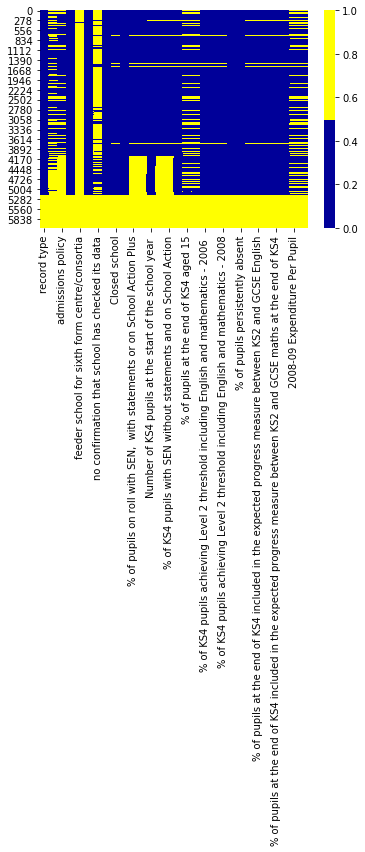

In [97]:
#df.dtypes
#Check missing values
#Use heatmap to display missing values
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))





record type: proportion missing: 0.148014440433213, 902/6094
type of specialist school: proportion missing: 0.5009845749917952, 3053/6094
admissions policy: proportion missing: 0.4804725959960617, 2928/6094
gender of entry: proportion missing: 0.148014440433213, 902/6094
feeder school for sixth form centre/consortia: proportion missing: 0.9880210042664916, 6021/6094
age range: proportion missing: 0.148014440433213, 902/6094
no confirmation that school has checked its data: proportion missing: 0.758615031178208, 4623/6094
number of pupils on roll (all ages): proportion missing: 0.148014440433213, 902/6094
Closed school: proportion missing: 0.16114210699048245, 982/6094
institution in Key Stage 5 Performance Tables: proportion missing: 0.148014440433213, 902/6094
% of pupils on roll with SEN,  with statements or on School Action Plus: proportion missing: 0.34246800131276667, 2087/6094
% of pupils on roll with SEN on School Action: proportion missing: 0.34246800131276667, 2087/6094
Number

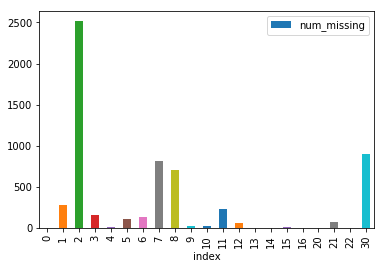

In [98]:
#Can visualise using barchart
column_missing_count = {}
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    column_missing_count[col] = num_missing
    
    if num_missing > 0:  
        print('{}: proportion missing: {}, {}/{}'.format(col, num_missing/len(df), num_missing, len(df)))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [99]:
# Drop rows with more than 50% missing values.
#ind_missing = df[df['num_missing'] > 35].index
#df_less_missing_rows = df.drop(ind_missing, axis=0)
#df = df_less_missing_rows


In [100]:
# Drop specific columns based on extent of missingness
missingthreshold = 0.5
missingthreshold = missingthreshold * len(df)
cols_to_drop = [k for (k, v) in column_missing_count.items() if v > missingthreshold] 

#maxcol = max(column_missing_count, key=column_missing_count.get)
#print(maxcol)

#cols_to_drop = [maxcol]
print('{} dropped columns: '.format(len(cols_to_drop)))
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)

3 dropped columns: 
['type of specialist school', 'feeder school for sixth form centre/consortia', 'no confirmation that school has checked its data']


In [101]:

added_cols = list(filter(lambda x: re.search('.+ismissing$', x), df.columns))
added_cols.append('num_missing')
print(len(added_cols))

31


In [102]:
df = df.drop(added_cols, axis=1)
print('Dataset size with rows and columns removed by thresholds: {} rows, {} columns'.format(df.shape[0], df.shape[1]))

Dataset size with rows and columns removed by thresholds: 6094 rows, 27 columns


In [103]:
percentage_cols = list(filter(lambda x: re.search('.*%', x), df.columns))
percentage_cols

['% of pupils on roll with SEN,  with statements or on School Action Plus',
 '% of pupils on roll with SEN on School Action',
 '% of KS4 pupils with SEN with statements or on School Action Plus',
 '% of KS4 pupils with SEN without statements and on School Action',
 'Coverage indicator - % of pupils included in KS2 - KS4 and Equivalent CVA calculation',
 '% of pupils at the end of KS4 aged 15',
 '% of pupils at the end of KS4 aged 14 or under',
 '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2006 ',
 '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2007',
 '% of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008',
 '% of half days missed due to overall absence',
 '% of pupils persistently absent',
 '% of pupils making expected progress between KS2 and GCSE English at end of KS4',
 '% of pupils at the end of KS4 included in the expected progress measure between KS2 and GCSE English',
 '% of pup

In [104]:
df.head()

record type admissions policy gender of entry age range  \
0          1.0               NaN           GIRLS     07-18   
1          1.0               NaN            BOYS     10-18   
2          1.0              COMP           MIXED     11-18   
3          1.0              COMP           GIRLS     11-18   
4          1.0              COMP           MIXED     11-18   

  number of pupils on roll (all ages)  Closed school  \
0                                 695            0.0   
1                                 884            0.0   
2                                1218            0.0   
3                                1241            0.0   
4                                 985            0.0   

   institution in Key Stage 5 Performance Tables  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

  % of pupils on roll with SEN,  with statements or on School Action Plus  \
0                                               0.0%                        
1                                               0.0%                        
2                                              25.6%                        
3                                               6.7%                        
4                                              12.8%                        

  % of pupils on roll with SEN on School Action  \
0                                          0.0%   
1                                          0.0%   
2                                         21.3%   
3                                         20.6%   
4                                         13.0%   

   Number of KS4 pupils at the start of the school year   \
0                                               87.0       
1                                              257.0       
2                                              165.0       
3                                              168.0       
4                                              174.0       

               ...                \
0              ...                 
1              ...                 
2              ...                 
3              ...                 
4              ...                 

  % of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008  \
0                                                 0%                                     
1                                                 0%                                     
2                                                32%                                     
3                                                44%                                     
4                                                36%                                     

  % of half days missed due to overall absence  \
0                                            @   
1                                            @   
2                                         8.1%   
3                                         8.3%   
4                                         9.0%   

  % of pupils persistently absent  \
0                               @   
1                               @   
2                            5.2%   
3                            7.2%   
4                            8.0%   

  % of pupils making expected progress between KS2 and GCSE English at end of KS4  \
0                                                  ;                                
1                                                  ;                                
2                                                72%                                
3                                                70%                                
4                                                63%                                

  % of pupils at the end of KS4 included in the expected

In [105]:
def extractPercent(val):
    
    try:
        newval = float(val.strip('%')) 
        if newval <= 100:
            return newval
        else:
            return -1
    except:
        #Non-percentage
        return -1
    
test = df[percentage_cols[0]][0]
print(extractPercent(test))

0.0


In [106]:
## Convert percentage columns to floats
for perccol in percentage_cols:
    #newcol = perccol + '_F'
    df[perccol] = df[perccol].apply(lambda x: extractPercent(x))

In [107]:
target_col = '% of pupils achieving English and Maths Skills at Level 2 (C+ at GCSE, AS, Level 2 Key Skills, Basic Skills and Functional Skills in English and maths)'
print('No. valid rows: {}'.format(len(df[df[target_col]>0])))



No. valid rows: 3704


In [108]:
df.head()

record type admissions policy gender of entry age range  \
0          1.0               NaN           GIRLS     07-18   
1          1.0               NaN            BOYS     10-18   
2          1.0              COMP           MIXED     11-18   
3          1.0              COMP           GIRLS     11-18   
4          1.0              COMP           MIXED     11-18   

  number of pupils on roll (all ages)  Closed school  \
0                                 695            0.0   
1                                 884            0.0   
2                                1218            0.0   
3                                1241            0.0   
4                                 985            0.0   

   institution in Key Stage 5 Performance Tables  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

   % of pupils on roll with SEN,  with statements or on School Action Plus  \
0                                                0.0                         
1                                                0.0                         
2                                               25.6                         
3                                                6.7                         
4                                               12.8                         

   % of pupils on roll with SEN on School Action  \
0                                            0.0   
1                                            0.0   
2                                           21.3   
3                                           20.6   
4                                           13.0   

   Number of KS4 pupils at the start of the school year   \
0                                               87.0       
1                                              257.0       
2                                              165.0       
3                                              168.0       
4                                              174.0       

                ...                \
0               ...                 
1               ...                 
2               ...                 
3               ...                 
4               ...                 

   % of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008  \
0                                                0.0                                      
1                                                0.0                                      
2                                               32.0                                      
3                                               44.0                                      
4                                               36.0                                      

   % of half days missed due to overall absence  \
0                                          -1.0   
1                                          -1.0   
2                                           8.1   
3                                           8.3   
4                                           9.0   

   % of pupils persistently absent  \
0                             -1.0   
1                             -1.0   
2                              5.2   
3                              7.2   
4                              8.0   

   % of pupils making expected progress between KS2 and GCSE English at end of KS4  \
0                                               -1.0                                 
1                                               -1.0                                 
2                                               72.0                                 
3                                               70.0                                 
4                                               63.0                                 

   % of pupils

In [109]:
df.dtypes

record type                                                                                                                                                float64
admissions policy                                                                                                                                           object
gender of entry                                                                                                                                             object
age range                                                                                                                                                   object
number of pupils on roll (all ages)                                                                                                                         object
Closed school                                                                                                                                              float64
institution in Key Sta

In [110]:
numdata = df.select_dtypes(include=np.number)
#numdata = numdata.drop(['Institution \'significantly affected\' (contingency)'], axis=1)
numdata.head()

record type  Closed school  institution in Key Stage 5 Performance Tables  \
0          1.0            0.0                                            1.0   
1          1.0            0.0                                            1.0   
2          1.0            0.0                                            1.0   
3          1.0            0.0                                            1.0   
4          1.0            0.0                                            1.0   

   % of pupils on roll with SEN,  with statements or on School Action Plus  \
0                                                0.0                         
1                                                0.0                         
2                                               25.6                         
3                                                6.7                         
4                                               12.8                         

   % of pupils on roll with SEN on School Action  \
0                                            0.0   
1                                            0.0   
2                                           21.3   
3                                           20.6   
4                                           13.0   

   Number of KS4 pupils at the start of the school year   \
0                                               87.0       
1                                              257.0       
2                                              165.0       
3                                              168.0       
4                                              174.0       

   % of KS4 pupils with SEN with statements or on School Action Plus  \
0                                                0.0                   
1                                                0.0                   
2                                               29.1                   
3                                               26.2                   
4                                               21.3                   

   % of KS4 pupils with SEN without statements and on School Action  \
0                                                0.0                  
1                                                0.0                  
2                                               26.1                  
3                                               26.8                  
4                                                8.0                  

   Coverage indicator - % of pupils included in KS2 - KS4 and Equivalent CVA calculation  \
0                                               -1.0                                       
1                                               -1.0                                       
2                                               89.0                                       
3                                               96.0                                       
4                                               85.0                                       

   % of pupils at the end of KS4 aged 15               ...                \
0                                   -1.0               ...                 
1                                   -1.0               ...                 
2                                  100.0               ...                 
3                                   98.0               ...                 
4                                   99.0               ...                 

   % of KS4 pupils achieving Level 2 threshold including English and mathematics - 2008  \
0                                                0.0                                      
1                                                0.0                                      
2                                               32.0                                      
3                                               44.0                                      
4                                               36.0  

## Regression models

In [111]:
ycol = '% of pupils achieving English and Maths Skills at Level 2 (C+ at GCSE, AS, Level 2 Key Skills, Basic Skills and Functional Skills in English and maths)'
numdata = numdata.dropna()
targetvar = numdata[ycol]
predvars = numdata.drop(ycol, axis=1)





In [113]:
corr = numdata.corr()
corr.style.background_gradient(cmap='coolwarm')

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(predvars, targetvar, test_size=0.3, random_state=3)

In [115]:
print('X_train: {}, X_test: {}'.format((X_train.shape), len(X_test)))

X_train: (2591, 22), X_test: 1111


linear regression train score:0.9291163755458006
linear regression test score: 0.9283289520203163
ridge regression train score low alpha: 0.9291163748400951
ridge regression test score low alpha: 0.9283289986551632
ridge regression train score high alpha: 0.9278985252932599
ridge regression test score high alpha: 0.9268881644450158


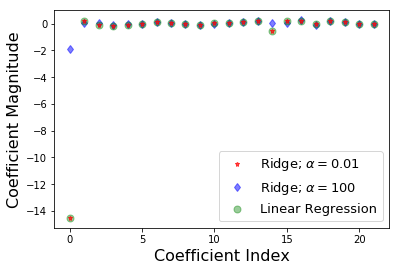

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:{}".format(train_score))
print("linear regression test score: {}".format(test_score))
print("ridge regression train score low alpha: {}".format(Ridge_train_score))
print("ridge regression test score low alpha: {}".format(Ridge_test_score))
print("ridge regression train score high alpha: {}".format(Ridge_train_score100))
print("ridge regression test score high alpha: {}".format(Ridge_test_score100))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [26]:
from sklearn import model_selection, preprocessing, feature_selection, linear_model
sel_columns = numdata.columns

selected = numdata[sel_columns]

## split data
dtf_train, dtf_test = model_selection.train_test_split(selected, 
                      test_size=0.3)
print("X_train shape:", dtf_train.drop(ycol,axis=1).shape, "| X_test shape:", dtf_test.drop(ycol,axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train[ycol]),2), "| y_test mean:", round(np.mean(dtf_test[ycol]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop(ycol,axis=1).columns)

## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop(ycol, axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop(ycol, 
                        axis=1).columns, index=dtf_train.index)## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled[ycol] = scalerY.fit_transform(
                    dtf_train[ycol].values.reshape(-1,1))
dtf_scaled.head()

X_train shape: (2591, 25) | X_test shape: (1111, 25)
y_train mean: 45.15 | y_test mean: 45.53
26 features: Index(['record type', 'institution in Key Stage 5 Performance Tables',
       'institution in Key Stage 5 Performance Tables', 'Closed school',
       'institution in Key Stage 5 Performance Tables',
       'institution in Key Stage 5 Performance Tables',
       '% of pupils on roll with SEN,  with statements or on School Action Plus',
       '% of pupils on roll with SEN on School Action',
       'Number of KS4 pupils at the start of the school year ',
       '% of KS4 pupils with SEN with statements or on School Action Plus',
       '% of KS4 pupils with SEN without statements and on School Action',
       'Coverage indicator - % of pupils included in KS2 - KS4 and Equivalent CVA calculation',
       '% of pupils at the end of KS4 aged 15',
       '% of pupils at the end of KS4 aged 14 or under',
       '% of KS4 pupils achieving Level 2 threshold including English and mathemati

record type  institution in Key Stage 5 Performance Tables  \
1857          0.0                                            1.0   
4259          1.0                                            0.0   
2635          0.0                                            1.0   
1469          0.0                                            0.0   
4803          1.0                                            0.0   

      institution in Key Stage 5 Performance Tables  Closed school  \
1857                                            1.0            0.0   
4259                                            0.0            0.0   
2635                                            1.0            0.0   
1469                                            0.0            0.0   
4803                                            0.0            0.0   

      institution in Key Stage 5 Performance Tables  \
1857                                            1.0   
4259                                            0.0   
2635                                            1.0   
1469                                            0.0   
4803                                            0.0   

      institution in Key Stage 5 Performance Tables  \
1857                                            1.0   
4259                                            0.0   
2635                                            1.0   
1469                                            0.0   
4803                                            0.0   

      % of pupils on roll with SEN,  with statements or on School Action Plus  \
1857                                             0.0125                         
4259                                            -0.9125                         
2635                                             1.3875                         
1469                                             0.0500                         
4803                                            -0.9125                         

      % of pupils on roll with SEN on School Action  \
1857                                       0.150628   
4259                                      -0.887029   
2635                                       0.317992   
1469                                       1.246862   
4803                                      -0.887029   

      Number of KS4 pupils at the start of the school year   \
1857                                           0.345133       
4259                                          -1.336283       
2635                                           0.566372       
1469                                           0.911504       
4803                                          -1.353982       

      % of KS4 pupils with SEN with statements or on School Action Plus  \
1857                                           0.516129                   
4259                                          -0.763441                   
2635                                           1.569892                   
1469                                          -0.290323                   
4803                                          -0.763441                   

                                                                               ...                                                                             \
1857                                                                           ...                                                                              
4259                                                                           ...                                                                              
2635                                                                           ...                                                                              
1469                                                                           ...                                                                              
4803                                                         

In [86]:
#selected = numdata[sel_columns]
#corr_matrix = selected.corr(method="pearson")
#sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
#plt.title("pearson correlation")

#corr_matrix = dtf_train.corr(method="spearman")
#sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
#plt.title("spearman correlation")

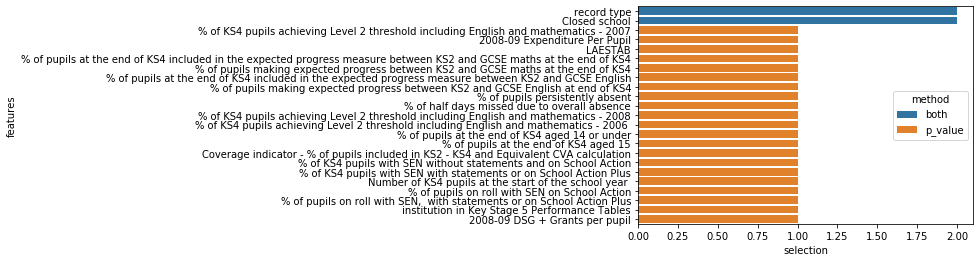

In [87]:
X = dtf_train.drop(ycol, axis=1).values
y = dtf_train[ycol].values
feature_names = dtf_train.drop(ycol, axis=1).columns## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k='all').fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=0.0, fit_intercept=True), 
                                 max_features=4).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

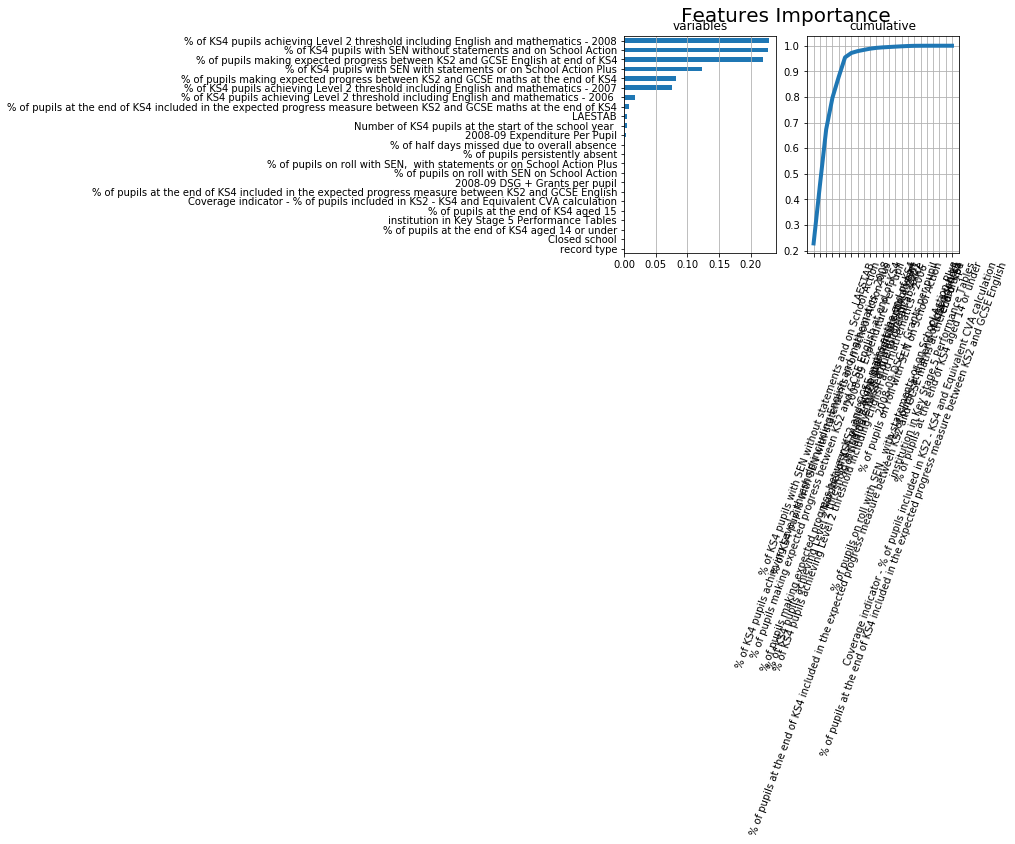

In [88]:
from sklearn import ensemble
X = dtf_train.drop(ycol, axis=1).values
y = dtf_train[ycol].values
feature_names = dtf_train.drop(ycol, axis=1).columns.tolist()## call model
model = ensemble.GradientBoostingRegressor()## Importance
model.fit(X,y)
importances = model.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

linear_regression
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): 0.08
Mean Absolute Error (Σ|y-pred|/n): 3.769452017210667
Standard deviation Absolute Error (Σ|y-pred|/n): 0.16602745165727312
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.9814236744425795
Max Error: 41.91368412033804




R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.35
Mean Absolute Error (Σ|y-pred|/n): 3.848713587644093
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.990302991060338
Max Error: 40.70243242693057


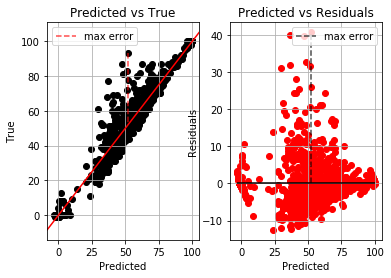

gradient_boosting
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.94
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): 0.95
Mean Absolute Error (Σ|y-pred|/n): 3.7377607303060065
Standard deviation Absolute Error (Σ|y-pred|/n): 0.07409874014562261
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6.04769740828104
Max Error: 38.34117715141142




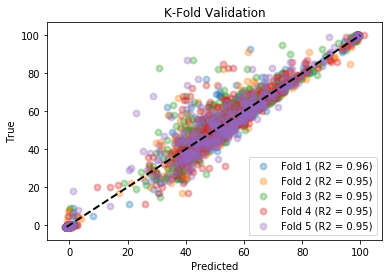

R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 2.35
Mean Absolute Error (Σ|y-pred|/n): 3.8458939944096024
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6.199280158480606
Max Error: 40.939570192678964


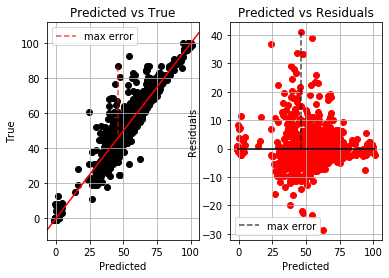

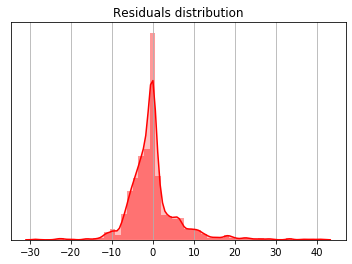

random_forest
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): nan
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): nan
Mean Absolute Error (Σ|y-pred|/n): 3.782022600635318
Standard deviation Absolute Error (Σ|y-pred|/n): 0.29609045353165003
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6.113534177943992
Max Error: 40.282




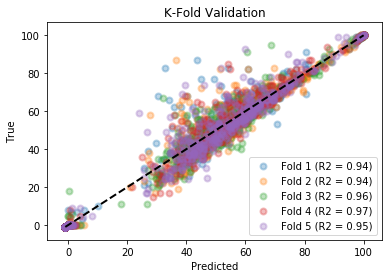

R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): nan
Mean Absolute Error (Σ|y-pred|/n): 3.9733033303330334
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6.369873088870518
Max Error: 45.27


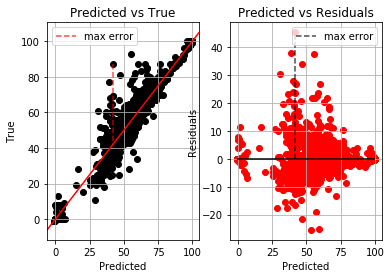

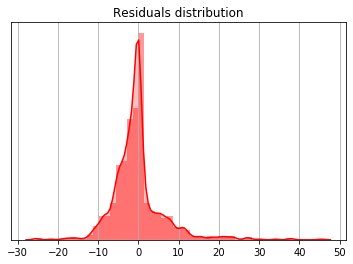

ridge_alpha0.9
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.28
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): 0.05
Mean Absolute Error (Σ|y-pred|/n): 3.7685142921184904
Standard deviation Absolute Error (Σ|y-pred|/n): 0.05312932274179717
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.965658125098784
Max Error: 42.99779016700894




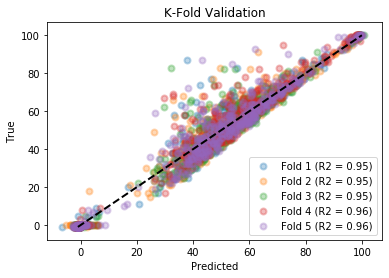

R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.34
Mean Absolute Error (Σ|y-pred|/n): 3.8488532064950958
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.990383927739382
Max Error: 40.70026827307579


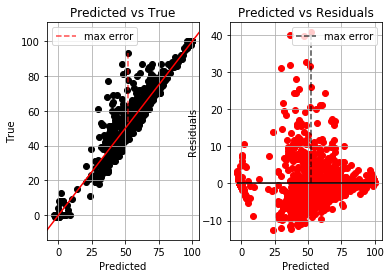

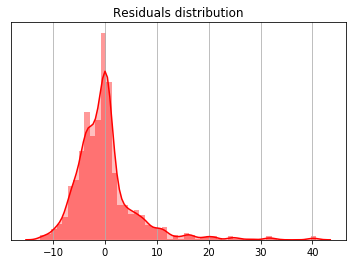

ridge_alpha0.1
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.29
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): 0.05
Mean Absolute Error (Σ|y-pred|/n): 3.7601189455118877
Standard deviation Absolute Error (Σ|y-pred|/n): 0.2333881705106881
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.940295894535
Max Error: 39.982828983450034




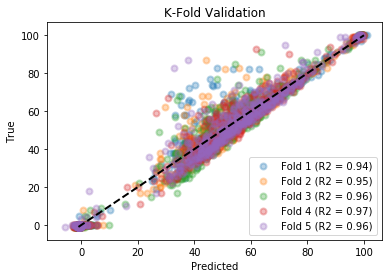

R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.35
Mean Absolute Error (Σ|y-pred|/n): 3.8487290399614094
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.990310975273228
Max Error: 40.7021942193348


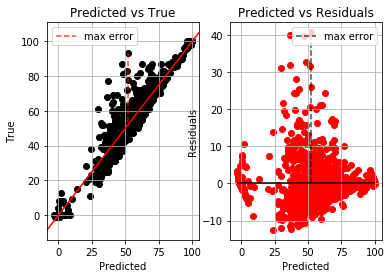

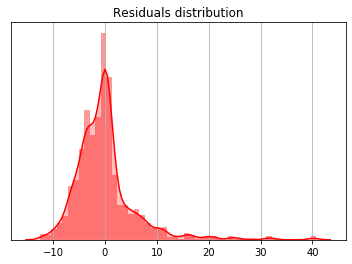

elastic_net
R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.42
Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n): 0.24
Mean Absolute Error (Σ|y-pred|/n): 3.740754409767436
Standard deviation Absolute Error (Σ|y-pred|/n): 0.10214673837243926
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.932333613788071
Max Error: 40.99913494527614




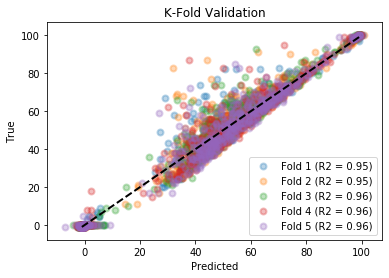

R2 (explained variance): 0.95
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.39
Mean Absolute Error (Σ|y-pred|/n): 3.8507037663959602
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.99241422631249
Max Error: 40.64783945570243


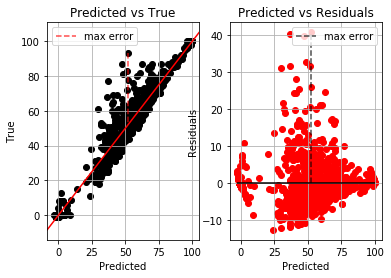

In [29]:
from sklearn import metrics
X_names = predvars.columns


X_train = dtf_train[X_names].values
y_train = dtf_train[ycol].values
X_test = dtf_test[X_names].values
y_test = dtf_test[ycol].values

model = linear_model.LinearRegression()
#model = linear_model.Ridge(alpha=0.9)
#model = linear_model.ElasticNet(alpha=0.01)
#model = ensemble.GradientBoostingRegressor()
#model = ensemble.RandomForestRegressor()

models = {
    'linear_regression': linear_model.LinearRegression(),
    'gradient_boosting': ensemble.GradientBoostingRegressor(),
    'random_forest': ensemble.RandomForestRegressor(),
    'ridge_alpha0.9': linear_model.Ridge(alpha=0.9),
    'ridge_alpha0.1': linear_model.Ridge(alpha=0.1),
    'elastic_net': linear_model.ElasticNet(alpha=0.01)
}
evaluation_metrics = {}
for m in models.keys():
    model = models[m]
    evaluation_metrics[m] = {'r2': [],'mape': [], 'mae': [], 'rmse': [], 'max_error': []}
    cv = model_selection.KFold(n_splits=5, shuffle=True)
    i = 0
    for train, test in cv.split(X_train, y_train):
        i += 1
        predicted = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
        true = y_train[test]
        
        r2 = metrics.r2_score(true, predicted)
        mape = np.mean(np.abs((true-predicted)/predicted))
        
        mae = metrics.mean_absolute_error(true, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
        residuals = true - predicted
        max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
        max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
        max_true, max_pred = true[max_idx], predicted[max_idx]
        
        evaluation_metrics[m]['r2'].append(r2)
        evaluation_metrics[m]['mape'].append(mape)
        evaluation_metrics[m]['mae'].append(mae)
        evaluation_metrics[m]['rmse'].append(rmse)
        evaluation_metrics[m]['max_error'].append(max_error)
        
        plt.scatter(predicted, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,r2))
        
    ### CV results
    print(m)
    print("R2 (explained variance):", round(np.mean(evaluation_metrics[m]['r2']), 2))
    print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(evaluation_metrics[m]['mape']), 2))
    print("Standard deviation Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.std(evaluation_metrics[m]['mape']), 2))
    print("Mean Absolute Error (Σ|y-pred|/n):", "{}".format(np.mean(evaluation_metrics[m]['mae'])))
    print("Standard deviation Absolute Error (Σ|y-pred|/n):", "{}".format(np.std(evaluation_metrics[m]['mae'])))
    print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{}".format(np.mean(evaluation_metrics[m]['rmse'])))## residuals
    print("Max Error:", "{}".format(np.mean(evaluation_metrics[m]['max_error'])))
    print('\n')
    
    plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('K-Fold Validation')
    plt.legend()
    plt.show()
    
    ## Results with test data
    ## train
    model.fit(X_train, y_train)## test
    predicted = model.predict(X_test)
    
    
    
    ## Kpi
    print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
    print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
    print("Mean Absolute Error (Σ|y-pred|/n):", "{}".format(metrics.mean_absolute_error(y_test, predicted)))
    print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))## residuals
    residuals = y_test - predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_test[max_idx], predicted[max_idx]
    print("Max Error:", "{}".format(max_error))
    
    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2)
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(predicted, y_test, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()
    
    ## Plot predicted vs residuals
    ax[1].scatter(predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
    ax[1].legend()
    plt.show()
    
    fig, ax = plt.subplots()
    sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
    ax.grid(True)
    ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
    plt.show()

    
    

    

In [55]:
len(y_test)

1111

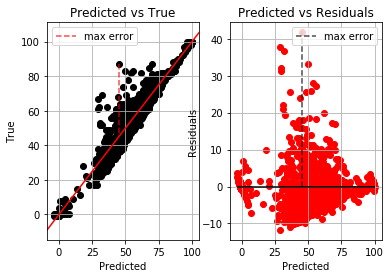

In [52]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

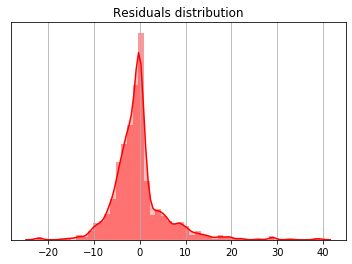

In [35]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

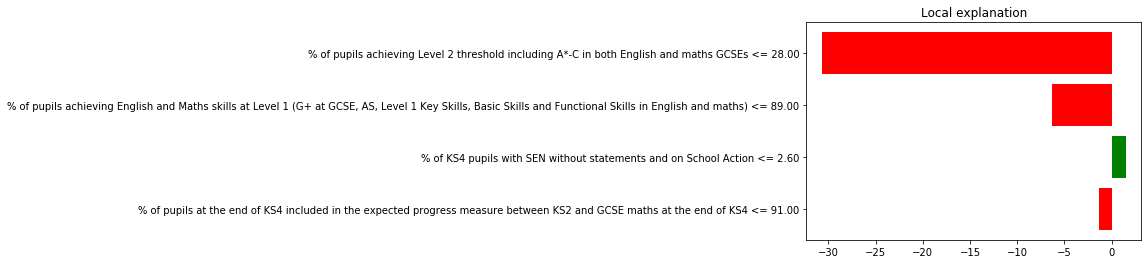

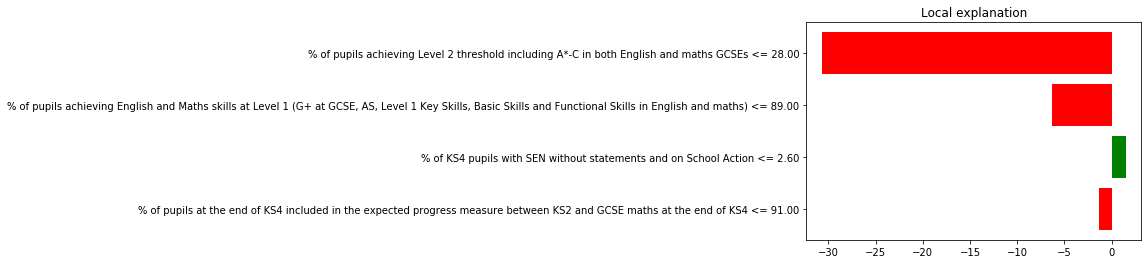

In [36]:
#!pip install lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Y", mode="regression")
explained = explainer.explain_instance(X_test[2], model.predict, num_features=4)
explained.as_pyplot_figure()

In [43]:
#df['age range'].value_counts()